## Customer Segmentation and Analysis using KMeans
In the bootcamp session we had worked on segmentation using Age and Spending Score.
The assignment is to do the same for Spending Score and Annual Income.

Kindly complete the following steps:
1. Apply KMeans with a range of K values (number of clusters) and store the inertia.
2. Plot the inertia values as a elbow curve to decide the optimal number of clusters.
3. Run the KMeans algorithm with the desired number of clusters and plot the results using a scatter plot.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### Data Load
    

In [2]:
cust_df = pd.read_csv('customers.csv',index_col = 'CustomerID')

In [3]:
# Get the top 5 data
cust_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# Check for null values
cust_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Segmentation using  Annual Income and Spending Score

KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

iloc: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [5]:
x1 = cust_df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = (KMeans(n_clusters=n))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)
print(inertia)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30227.606513152015, 25018.78161341407, 21932.39204424098, 19641.456216651564]


### Plot the Elbow curve

Pyplot: https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html

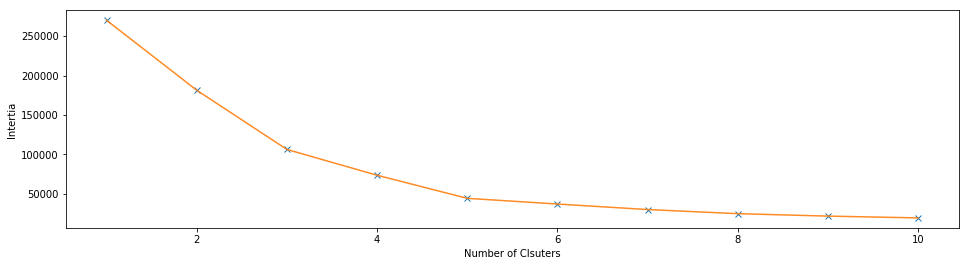

In [6]:
plt.figure(figsize = (16,4))
plt.plot(np.arange(1,11),inertia,'x')
plt.plot(np.arange(1,11),inertia,'-',alpha = 0.9)
plt.xlabel('Number of Clsuters')
plt.ylabel('Intertia')
plt.show()

### Apply KMeans with desired number of clusters

In [11]:
algorithm = (KMeans(n_clusters=5,n_init = 10,max_iter=300))
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

centroids1

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

### Plot the results using a scatter plot

Scatter Plot: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html

Text(0, 0.5, 'Spending Score')

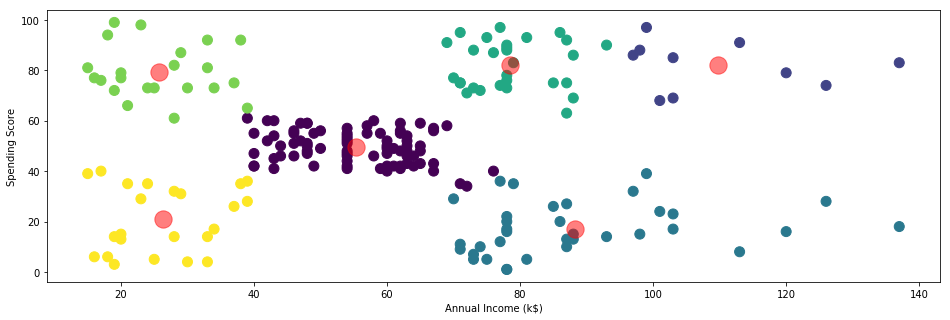

In [10]:
algorithm = (KMeans(n_clusters=6,n_init = 20,max_iter=300))
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

plt.figure(figsize = (16,5))
plt.clf()
plt.scatter(x ='Annual Income (k$)', y = 'Spending Score (1-100)', data = cust_df, c = labels1,s = 100)
plt.scatter(x = centroids1[:,0], y = centroids1[:,1], data = cust_df, c = 'red', alpha = 0.5, s = 300)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')